
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 5 - RL <br>
<font color=696880 size=4>
Amirmahdi Meighani


____

# Personal Data

In [1]:
# Set your student number and name
student_number = "401106663"
Name = "Arian"
Last_Name = "Noori"

# Rules

<font color=red>
Please run all the cells.
</font>

# Q1: Mountain Car (100 Points)

In this notebook we have a game called mountain car. the car is in a valley and at evey moment we can model its state using two floats as speed and location along x axis. You can control the car using three actions.

0: Accelerate to the left

1: Don’t accelerate

2: Accelerate to the right

the goal is to reach the peak of mountain in the minimum number of frames. because you get -1 reward for evey timestamp.

you should model the countious enviroment with a approximate descrete one and train your agent using Q learning and SARSA algorithms.


install required libraries

In [2]:
!pip install numpy
!pip install matplotlib
!pip install gymnasium
!pip install gymnasium[classic-control]

## imports

In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [4]:
def visualize(env):
    '''
    use this function to see the state of the game in the current moment
    '''
    env_screen = env.render()
    plt.imshow(env_screen)
    plt.axis('off');
    title = 'speed is ' + str(env.unwrapped.state[1])

    plt.title(title)
    plt.show()

## Q Learning

in this question we have a countious enviroment but you can approximate it as a discrete enviormnet then learn and act according to that.

you can see the information of game below.

In [5]:
env = gym.make("MountainCar-v0",render_mode='rgb_array',max_episode_steps=200)
spec = gym.spec('MountainCar-v0')

Action Space: Discrete(3)
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Max Episode Steps: 200
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: -110.0



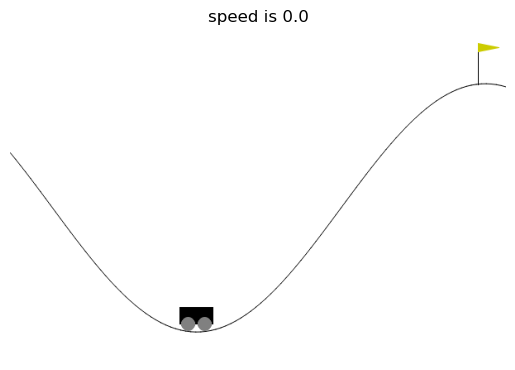

In [6]:
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")
env.reset()
visualize(env)

Observation Space:
The observation is a ndarray with shape (2,) where the elements correspond to the following:

| Num |              Observation             |  Min  |  Max |
|:---:|:------------------------------------:|:-----:|:----:|
|  0  | position of the car along the x-axis |  -1.2 |  0.6 |
|  1  | velocity of the car                  | -0.07 | 0.07 |

Action Space:
There are 3 discrete deterministic actions:

0: Accelerate to the left

1: Don’t accelerate

2: Accelerate to the right

You can play in this env yourself!!!

Try some actions and visulize the env after every 5 action. use env.step(action) function to do actions. print output of some step function. It returns five values :

new_state, reward, is_terminated ,is_truncated ,extra_info

new state after the action, reward for that action in that step, is the game terminated by reaching the goal, is the game finished by reaching 200 episode limit that is the default in this game, and some possible extra info that we don't use.


STEP:  1
ACTION:  0
NEW_STATE:  [-0.5118471  -0.00109634]
REWARD:  -1.0
TERMINATED?  False
TRUNCATED?  False




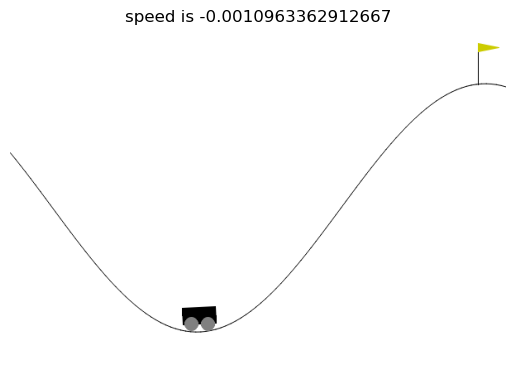

STEP:  2
ACTION:  2
NEW_STATE:  [-5.1203156e-01 -1.8445567e-04]
REWARD:  -1.0
TERMINATED?  False
TRUNCATED?  False




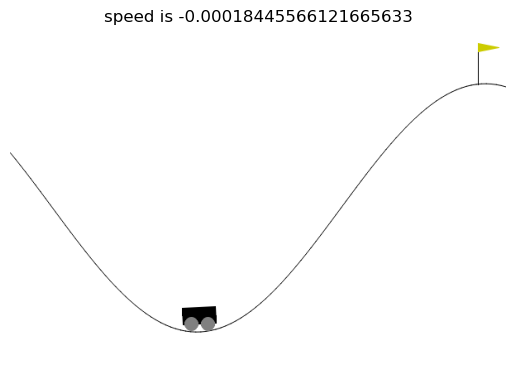

STEP:  3
ACTION:  2
NEW_STATE:  [-0.51130277  0.00072881]
REWARD:  -1.0
TERMINATED?  False
TRUNCATED?  False




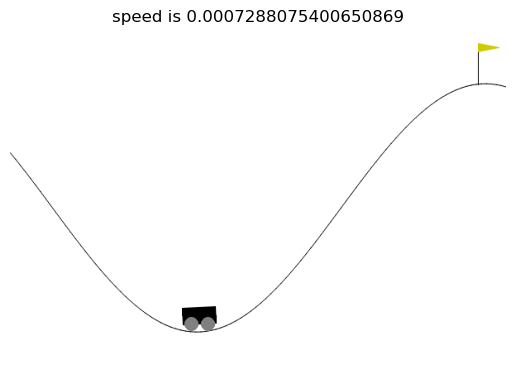

STEP:  4
ACTION:  0
NEW_STATE:  [-5.1166612e-01 -3.6339182e-04]
REWARD:  -1.0
TERMINATED?  False
TRUNCATED?  False




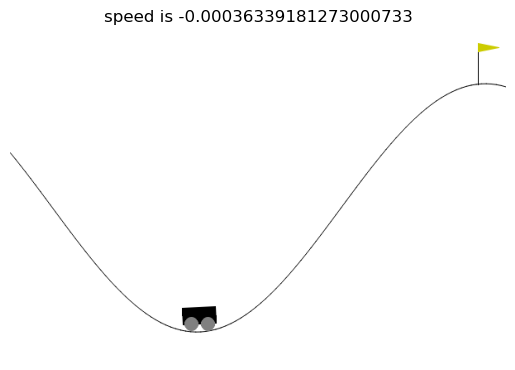

STEP:  5
ACTION:  0
NEW_STATE:  [-0.513119   -0.00145287]
REWARD:  -1.0
TERMINATED?  False
TRUNCATED?  False




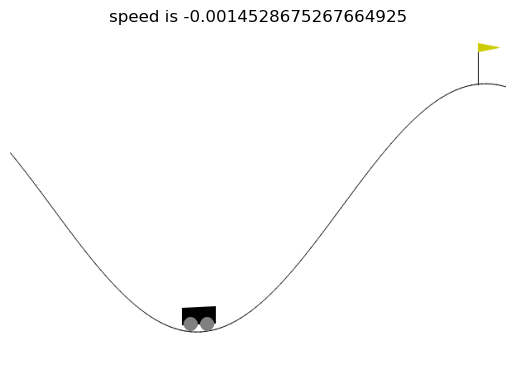

STEP:  6
ACTION:  1
NEW_STATE:  [-0.51465046 -0.00153145]
REWARD:  -1.0
TERMINATED?  False
TRUNCATED?  False




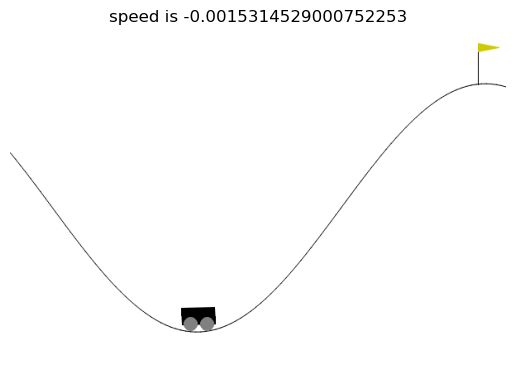

STEP:  7
ACTION:  0
NEW_STATE:  [-0.517249   -0.00259856]
REWARD:  -1.0
TERMINATED?  False
TRUNCATED?  False




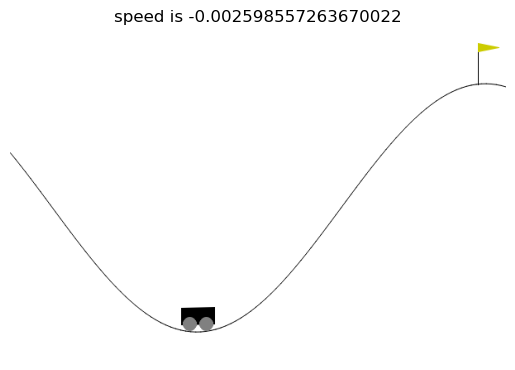

STEP:  8
ACTION:  0
NEW_STATE:  [-0.5208952  -0.00364618]
REWARD:  -1.0
TERMINATED?  False
TRUNCATED?  False




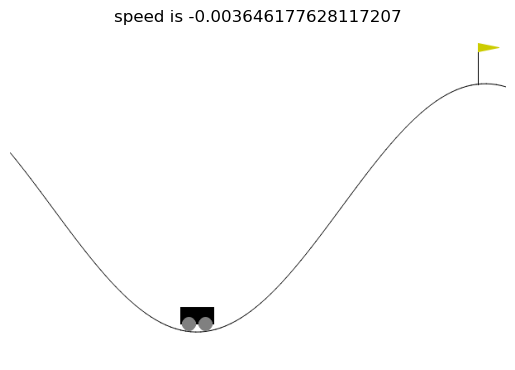

STEP:  9
ACTION:  0
NEW_STATE:  [-0.52556163 -0.00466645]
REWARD:  -1.0
TERMINATED?  False
TRUNCATED?  False




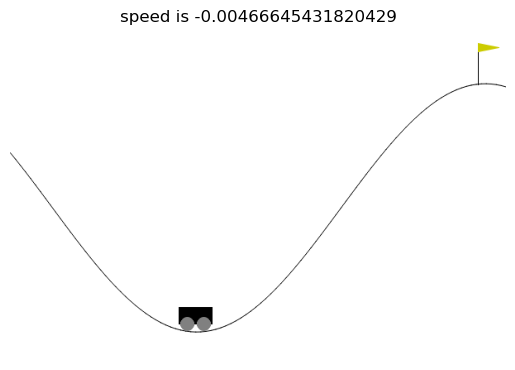

STEP:  10
ACTION:  0
NEW_STATE:  [-0.5312134  -0.00565173]
REWARD:  -1.0
TERMINATED?  False
TRUNCATED?  False




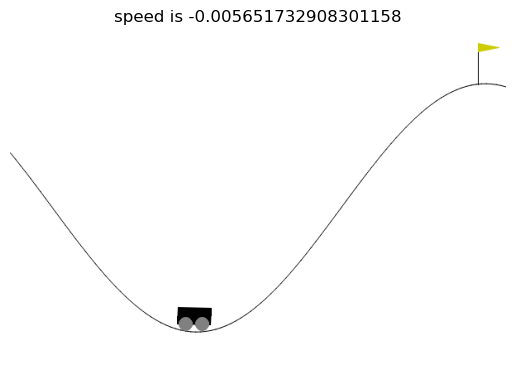

STEP:  11
ACTION:  0
NEW_STATE:  [-0.537808   -0.00659463]
REWARD:  -1.0
TERMINATED?  False
TRUNCATED?  False




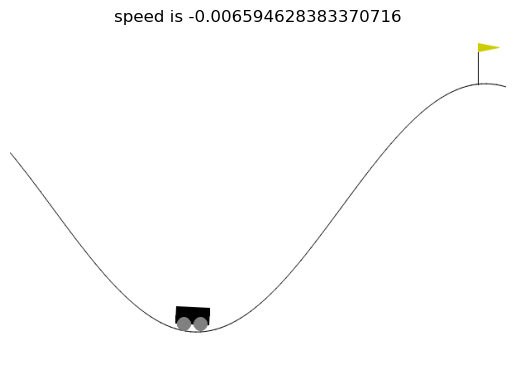

STEP:  12
ACTION:  0
NEW_STATE:  [-0.5452961  -0.00748809]
REWARD:  -1.0
TERMINATED?  False
TRUNCATED?  False




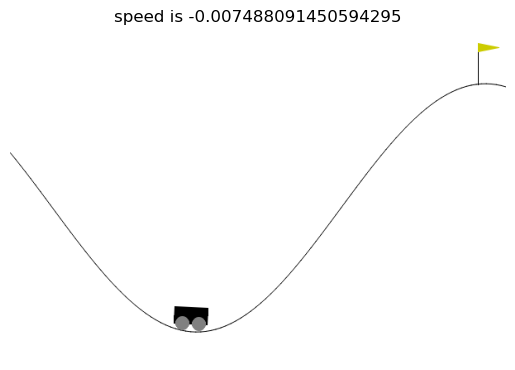

STEP:  13
ACTION:  2
NEW_STATE:  [-0.55162156 -0.00632548]
REWARD:  -1.0
TERMINATED?  False
TRUNCATED?  False




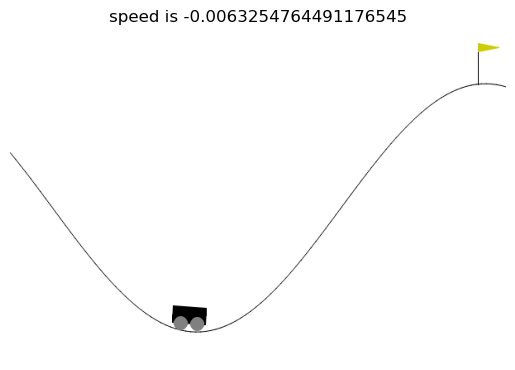

STEP:  14
ACTION:  0
NEW_STATE:  [-0.5587371  -0.00711555]
REWARD:  -1.0
TERMINATED?  False
TRUNCATED?  False




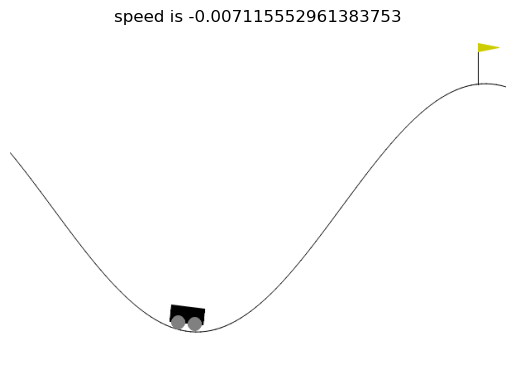

STEP:  15
ACTION:  0
NEW_STATE:  [-0.56658965 -0.0078525 ]
REWARD:  -1.0
TERMINATED?  False
TRUNCATED?  False




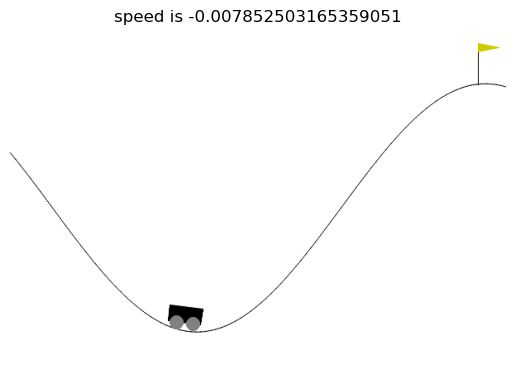

(array([-0.53171337,  0.        ], dtype=float32), {})

In [7]:
env.reset() # You can use this function to reset your environment.
######################## YOUR CODE HERE ########################
for i in range(15):  # Perform 15 steps
    action = random.choice([0, 1, 2])  # Randomly choose an action
    new_state , reward , terminated , truncated , extra_info = env.step(action)
    print("STEP: " , (i + 1))
    print("ACTION: " , action)
    print("NEW_STATE: " , new_state)
    print("REWARD: " , reward)
    print("TERMINATED? " , terminated)
    print("TRUNCATED? " , truncated)
    print("\n")
    visualize(env)
######################## END YOUR CODE #########################
env.reset()

the state consists of two floats.  first one is position in x axis and second one is speed. in the next cell we will write our agent. First we need to convert continuous state to descrete so complete the relevant functions. after that we need to train our agent using Q_learning formula:


$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

After training we use create policy to save your best actions. Then evaluate your policy.

In [8]:
class MountainCarQL:
    def __init__(self, env, discrete_size=20):
        
        self.env = env
        self.discrete_size = discrete_size
        self.q_values = self._initialize_q_values()
        self.policy = {}
        self.position_min, self.position_max = env.observation_space.low[0], env.observation_space.high[0]
        self.velocity_min, self.velocity_max = env.observation_space.low[1], env.observation_space.high[1]

    def _initialize_q_values(self):
        
        return np.zeros((self.discrete_size, self.discrete_size, self.env.action_space.n))

    def _get_discrete_state(self, state):
        
        position, velocity = state
        position_discrete = int(((position - self.position_min) / (self.position_max - self.position_min)) * (self.discrete_size - 1))
        velocity_discrete = int(((velocity - self.velocity_min) / (self.velocity_max - self.velocity_min)) * (self.discrete_size - 1))
        return (position_discrete, velocity_discrete)

    def learn(self, num_episodes, alpha, gamma, epsilon):
        
        for episode in range(num_episodes):
            state = self.env.reset()[0]
            discrete_state = self._get_discrete_state(state)
            while (True):
                
                # epsilon:
                if (random.random() > epsilon):
                    action = np.argmax(self.q_values[discrete_state])
                else:
                    action = self.env.action_space.sample()

                
                new_state , reward , terminated , truncated , info = self.env.step(action)
                new_discrete_state = self._get_discrete_state(new_state)
                # Update Q-values in this part:
                if (not truncated and not terminated):
                    max_future_q = np.max(self.q_values[new_discrete_state])
                    current_q = self.q_values[discrete_state + (action,)]
                    new_q = (1 - alpha) * current_q + alpha * (reward + gamma * max_future_q)
                    self.q_values[discrete_state + (action,)] = new_q
                elif (new_state[0] >= self.env.goal_position):
                    print("You reached to the goal in episode: " , episode)
                    self.q_values[discrete_state + (action,)] = 0

                discrete_state = new_discrete_state
                if(terminated or truncated):
                    break;

    def create_policy(self):
        
        for position in range(self.discrete_size):
            for velocity in range(self.discrete_size):
                self.policy[(position, velocity)] = np.argmax(self.q_values[position, velocity])

    def act(self):
        
        current_state = self.env.unwrapped.state
        discrete_state = self._get_discrete_state(current_state)
        action = self.policy[discrete_state]
        new_state , reward , terminated , truncated , _ = self.env.step(action)
        self.endstate = terminated or truncated
        if(terminated):
            return new_state , reward , True
        if(truncated):
            return new_state , reward , True
        return new_state, reward, False

    def evaluate(self, num_episodes):
        total_rewards = 0
        wins = 0

        for i in range(num_episodes):
            state = self.env.reset()[0]
            discrete_state = self._get_discrete_state(state)
            episode_reward = 0

            while True:
                action = self.policy[discrete_state]
                new_state, reward, terminated, truncated, _ = self.env.step(action)
                discrete_state = self._get_discrete_state(new_state)
                episode_reward += reward

                if (terminated or truncated):
                    if (terminated and new_state[0] >= self.env.goal_position):
                        wins += 1
                    break

            total_rewards += episode_reward

        average_reward = total_rewards / num_episodes
        win_percentage = (wins / num_episodes) * 100

        return average_reward, win_percentage


train your agent with good parameters

In [9]:
EPISODES = 10000
LEARNING_RATE = 0.2
DISCOUNT = 0.9
EPSILON = 0.2
DISCRETE_SIZE = 30

player = MountainCarQL(env , DISCRETE_SIZE)
player.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON)

C:\Users\Acer\anaconda3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.goal_position to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.goal_position` for environment variables or `env.get_wrapper_attr('goal_position')` that will search the reminding wrappers.
  logger.warn(


You reached to the goal in episode:  915
You reached to the goal in episode:  921
You reached to the goal in episode:  931
You reached to the goal in episode:  933
You reached to the goal in episode:  939
You reached to the goal in episode:  944
You reached to the goal in episode:  947
You reached to the goal in episode:  948
You reached to the goal in episode:  1075
You reached to the goal in episode:  1079
You reached to the goal in episode:  1084
You reached to the goal in episode:  1085
You reached to the goal in episode:  1095
You reached to the goal in episode:  1117
You reached to the goal in episode:  1156
You reached to the goal in episode:  1177
You reached to the goal in episode:  1183
You reached to the goal in episode:  1184
You reached to the goal in episode:  1186
You reached to the goal in episode:  1188
You reached to the goal in episode:  1192
You reached to the goal in episode:  1196
You reached to the goal in episode:  1205
You reached to the goal in episode:  1206


You reached to the goal in episode:  2264
You reached to the goal in episode:  2315
You reached to the goal in episode:  2317
You reached to the goal in episode:  2318
You reached to the goal in episode:  2321
You reached to the goal in episode:  2328
You reached to the goal in episode:  2330
You reached to the goal in episode:  2339
You reached to the goal in episode:  2341
You reached to the goal in episode:  2342
You reached to the goal in episode:  2348
You reached to the goal in episode:  2364
You reached to the goal in episode:  2371
You reached to the goal in episode:  2376
You reached to the goal in episode:  2380
You reached to the goal in episode:  2384
You reached to the goal in episode:  2388
You reached to the goal in episode:  2389
You reached to the goal in episode:  2390
You reached to the goal in episode:  2425
You reached to the goal in episode:  2427
You reached to the goal in episode:  2430
You reached to the goal in episode:  2432
You reached to the goal in episode

You reached to the goal in episode:  2904
You reached to the goal in episode:  2905
You reached to the goal in episode:  2907
You reached to the goal in episode:  2908
You reached to the goal in episode:  2909
You reached to the goal in episode:  2912
You reached to the goal in episode:  2914
You reached to the goal in episode:  2922
You reached to the goal in episode:  2925
You reached to the goal in episode:  2930
You reached to the goal in episode:  2937
You reached to the goal in episode:  2940
You reached to the goal in episode:  2945
You reached to the goal in episode:  2948
You reached to the goal in episode:  2950
You reached to the goal in episode:  2952
You reached to the goal in episode:  2956
You reached to the goal in episode:  2957
You reached to the goal in episode:  2959
You reached to the goal in episode:  2963
You reached to the goal in episode:  2964
You reached to the goal in episode:  2965
You reached to the goal in episode:  2969
You reached to the goal in episode

You reached to the goal in episode:  3482
You reached to the goal in episode:  3484
You reached to the goal in episode:  3485
You reached to the goal in episode:  3486
You reached to the goal in episode:  3487
You reached to the goal in episode:  3488
You reached to the goal in episode:  3489
You reached to the goal in episode:  3491
You reached to the goal in episode:  3492
You reached to the goal in episode:  3493
You reached to the goal in episode:  3495
You reached to the goal in episode:  3496
You reached to the goal in episode:  3497
You reached to the goal in episode:  3499
You reached to the goal in episode:  3501
You reached to the goal in episode:  3502
You reached to the goal in episode:  3505
You reached to the goal in episode:  3507
You reached to the goal in episode:  3508
You reached to the goal in episode:  3513
You reached to the goal in episode:  3515
You reached to the goal in episode:  3517
You reached to the goal in episode:  3519
You reached to the goal in episode

You reached to the goal in episode:  3993
You reached to the goal in episode:  3995
You reached to the goal in episode:  3999
You reached to the goal in episode:  4001
You reached to the goal in episode:  4003
You reached to the goal in episode:  4005
You reached to the goal in episode:  4006
You reached to the goal in episode:  4009
You reached to the goal in episode:  4010
You reached to the goal in episode:  4011
You reached to the goal in episode:  4014
You reached to the goal in episode:  4015
You reached to the goal in episode:  4018
You reached to the goal in episode:  4019
You reached to the goal in episode:  4020
You reached to the goal in episode:  4022
You reached to the goal in episode:  4023
You reached to the goal in episode:  4025
You reached to the goal in episode:  4029
You reached to the goal in episode:  4031
You reached to the goal in episode:  4033
You reached to the goal in episode:  4034
You reached to the goal in episode:  4035
You reached to the goal in episode

You reached to the goal in episode:  4486
You reached to the goal in episode:  4488
You reached to the goal in episode:  4491
You reached to the goal in episode:  4496
You reached to the goal in episode:  4499
You reached to the goal in episode:  4503
You reached to the goal in episode:  4506
You reached to the goal in episode:  4508
You reached to the goal in episode:  4509
You reached to the goal in episode:  4516
You reached to the goal in episode:  4521
You reached to the goal in episode:  4522
You reached to the goal in episode:  4523
You reached to the goal in episode:  4530
You reached to the goal in episode:  4534
You reached to the goal in episode:  4538
You reached to the goal in episode:  4540
You reached to the goal in episode:  4548
You reached to the goal in episode:  4551
You reached to the goal in episode:  4553
You reached to the goal in episode:  4561
You reached to the goal in episode:  4563
You reached to the goal in episode:  4568
You reached to the goal in episode

You reached to the goal in episode:  5202
You reached to the goal in episode:  5203
You reached to the goal in episode:  5204
You reached to the goal in episode:  5205
You reached to the goal in episode:  5207
You reached to the goal in episode:  5208
You reached to the goal in episode:  5209
You reached to the goal in episode:  5215
You reached to the goal in episode:  5217
You reached to the goal in episode:  5219
You reached to the goal in episode:  5221
You reached to the goal in episode:  5222
You reached to the goal in episode:  5223
You reached to the goal in episode:  5226
You reached to the goal in episode:  5228
You reached to the goal in episode:  5229
You reached to the goal in episode:  5230
You reached to the goal in episode:  5232
You reached to the goal in episode:  5234
You reached to the goal in episode:  5235
You reached to the goal in episode:  5236
You reached to the goal in episode:  5238
You reached to the goal in episode:  5239
You reached to the goal in episode

You reached to the goal in episode:  5586
You reached to the goal in episode:  5588
You reached to the goal in episode:  5590
You reached to the goal in episode:  5591
You reached to the goal in episode:  5592
You reached to the goal in episode:  5596
You reached to the goal in episode:  5597
You reached to the goal in episode:  5599
You reached to the goal in episode:  5606
You reached to the goal in episode:  5607
You reached to the goal in episode:  5609
You reached to the goal in episode:  5610
You reached to the goal in episode:  5611
You reached to the goal in episode:  5612
You reached to the goal in episode:  5613
You reached to the goal in episode:  5614
You reached to the goal in episode:  5615
You reached to the goal in episode:  5616
You reached to the goal in episode:  5617
You reached to the goal in episode:  5618
You reached to the goal in episode:  5619
You reached to the goal in episode:  5620
You reached to the goal in episode:  5622
You reached to the goal in episode

You reached to the goal in episode:  5945
You reached to the goal in episode:  5946
You reached to the goal in episode:  5947
You reached to the goal in episode:  5949
You reached to the goal in episode:  5950
You reached to the goal in episode:  5952
You reached to the goal in episode:  5953
You reached to the goal in episode:  5954
You reached to the goal in episode:  5957
You reached to the goal in episode:  5958
You reached to the goal in episode:  5959
You reached to the goal in episode:  5960
You reached to the goal in episode:  5961
You reached to the goal in episode:  5962
You reached to the goal in episode:  5963
You reached to the goal in episode:  5964
You reached to the goal in episode:  5966
You reached to the goal in episode:  5967
You reached to the goal in episode:  5968
You reached to the goal in episode:  5969
You reached to the goal in episode:  5970
You reached to the goal in episode:  5971
You reached to the goal in episode:  5972
You reached to the goal in episode

You reached to the goal in episode:  6441
You reached to the goal in episode:  6442
You reached to the goal in episode:  6444
You reached to the goal in episode:  6445
You reached to the goal in episode:  6446
You reached to the goal in episode:  6447
You reached to the goal in episode:  6450
You reached to the goal in episode:  6451
You reached to the goal in episode:  6454
You reached to the goal in episode:  6455
You reached to the goal in episode:  6456
You reached to the goal in episode:  6458
You reached to the goal in episode:  6459
You reached to the goal in episode:  6460
You reached to the goal in episode:  6462
You reached to the goal in episode:  6469
You reached to the goal in episode:  6471
You reached to the goal in episode:  6473
You reached to the goal in episode:  6477
You reached to the goal in episode:  6481
You reached to the goal in episode:  6483
You reached to the goal in episode:  6487
You reached to the goal in episode:  6489
You reached to the goal in episode

You reached to the goal in episode:  6990
You reached to the goal in episode:  6995
You reached to the goal in episode:  6998
You reached to the goal in episode:  6999
You reached to the goal in episode:  7001
You reached to the goal in episode:  7005
You reached to the goal in episode:  7007
You reached to the goal in episode:  7009
You reached to the goal in episode:  7023
You reached to the goal in episode:  7026
You reached to the goal in episode:  7030
You reached to the goal in episode:  7033
You reached to the goal in episode:  7037
You reached to the goal in episode:  7040
You reached to the goal in episode:  7046
You reached to the goal in episode:  7048
You reached to the goal in episode:  7049
You reached to the goal in episode:  7050
You reached to the goal in episode:  7054
You reached to the goal in episode:  7055
You reached to the goal in episode:  7056
You reached to the goal in episode:  7059
You reached to the goal in episode:  7062
You reached to the goal in episode

You reached to the goal in episode:  7475
You reached to the goal in episode:  7477
You reached to the goal in episode:  7478
You reached to the goal in episode:  7479
You reached to the goal in episode:  7480
You reached to the goal in episode:  7481
You reached to the goal in episode:  7482
You reached to the goal in episode:  7483
You reached to the goal in episode:  7484
You reached to the goal in episode:  7485
You reached to the goal in episode:  7487
You reached to the goal in episode:  7488
You reached to the goal in episode:  7489
You reached to the goal in episode:  7490
You reached to the goal in episode:  7491
You reached to the goal in episode:  7493
You reached to the goal in episode:  7494
You reached to the goal in episode:  7495
You reached to the goal in episode:  7496
You reached to the goal in episode:  7497
You reached to the goal in episode:  7498
You reached to the goal in episode:  7499
You reached to the goal in episode:  7500
You reached to the goal in episode

You reached to the goal in episode:  7984
You reached to the goal in episode:  7985
You reached to the goal in episode:  7987
You reached to the goal in episode:  7988
You reached to the goal in episode:  7989
You reached to the goal in episode:  7990
You reached to the goal in episode:  7991
You reached to the goal in episode:  7992
You reached to the goal in episode:  7993
You reached to the goal in episode:  7994
You reached to the goal in episode:  7995
You reached to the goal in episode:  7996
You reached to the goal in episode:  7997
You reached to the goal in episode:  7998
You reached to the goal in episode:  7999
You reached to the goal in episode:  8000
You reached to the goal in episode:  8001
You reached to the goal in episode:  8004
You reached to the goal in episode:  8005
You reached to the goal in episode:  8006
You reached to the goal in episode:  8007
You reached to the goal in episode:  8008
You reached to the goal in episode:  8009
You reached to the goal in episode

You reached to the goal in episode:  8603
You reached to the goal in episode:  8607
You reached to the goal in episode:  8610
You reached to the goal in episode:  8611
You reached to the goal in episode:  8612
You reached to the goal in episode:  8616
You reached to the goal in episode:  8620
You reached to the goal in episode:  8621
You reached to the goal in episode:  8623
You reached to the goal in episode:  8624
You reached to the goal in episode:  8625
You reached to the goal in episode:  8626
You reached to the goal in episode:  8630
You reached to the goal in episode:  8637
You reached to the goal in episode:  8669
You reached to the goal in episode:  8678
You reached to the goal in episode:  8680
You reached to the goal in episode:  8681
You reached to the goal in episode:  8682
You reached to the goal in episode:  8685
You reached to the goal in episode:  8695
You reached to the goal in episode:  8696
You reached to the goal in episode:  8702
You reached to the goal in episode

You reached to the goal in episode:  9089
You reached to the goal in episode:  9090
You reached to the goal in episode:  9091
You reached to the goal in episode:  9092
You reached to the goal in episode:  9093
You reached to the goal in episode:  9096
You reached to the goal in episode:  9099
You reached to the goal in episode:  9100
You reached to the goal in episode:  9101
You reached to the goal in episode:  9102
You reached to the goal in episode:  9112
You reached to the goal in episode:  9123
You reached to the goal in episode:  9124
You reached to the goal in episode:  9131
You reached to the goal in episode:  9133
You reached to the goal in episode:  9134
You reached to the goal in episode:  9136
You reached to the goal in episode:  9141
You reached to the goal in episode:  9143
You reached to the goal in episode:  9144
You reached to the goal in episode:  9145
You reached to the goal in episode:  9148
You reached to the goal in episode:  9151
You reached to the goal in episode

You reached to the goal in episode:  9680
You reached to the goal in episode:  9681
You reached to the goal in episode:  9683
You reached to the goal in episode:  9685
You reached to the goal in episode:  9688
You reached to the goal in episode:  9689
You reached to the goal in episode:  9690
You reached to the goal in episode:  9691
You reached to the goal in episode:  9695
You reached to the goal in episode:  9696
You reached to the goal in episode:  9699
You reached to the goal in episode:  9700
You reached to the goal in episode:  9701
You reached to the goal in episode:  9702
You reached to the goal in episode:  9703
You reached to the goal in episode:  9705
You reached to the goal in episode:  9706
You reached to the goal in episode:  9708
You reached to the goal in episode:  9709
You reached to the goal in episode:  9710
You reached to the goal in episode:  9711
You reached to the goal in episode:  9712
You reached to the goal in episode:  9713
You reached to the goal in episode

evaluate your agent with at least 200 episodes. your average score must be more than -170.

In [10]:
# Create policy after learning
player.create_policy()

# Evaluate the agent
average_reward, win_percentage = player.evaluate(200)

print("Average Reward: " , average_reward)
print("Win Percentage:" , win_percentage)

Average Reward:  -162.69
Win Percentage: 98.0


show the path your car took for only one episode. Use visualize function every 10 frame.

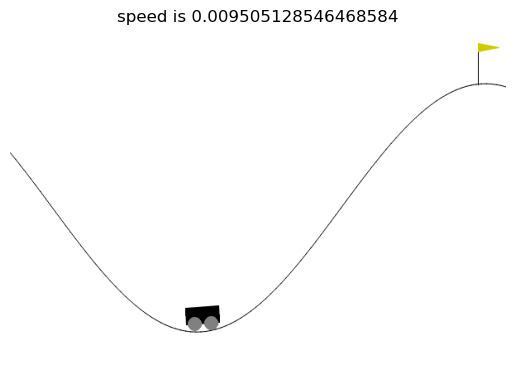

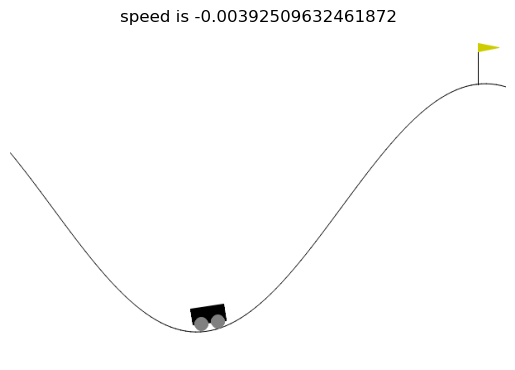

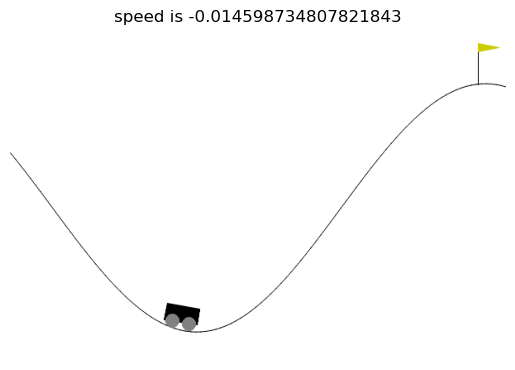

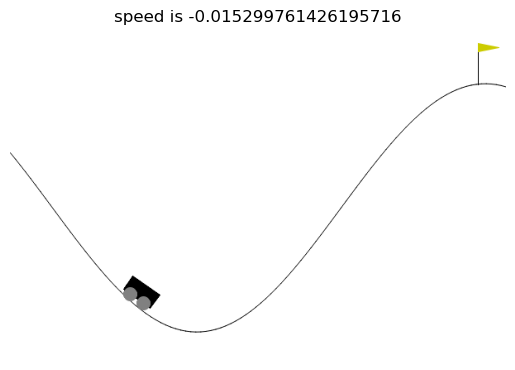

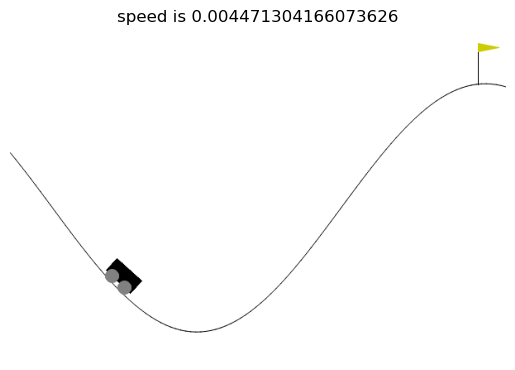

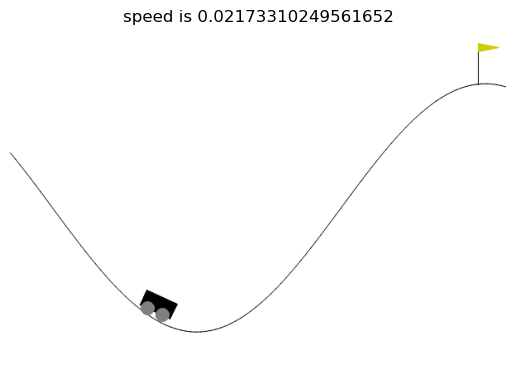

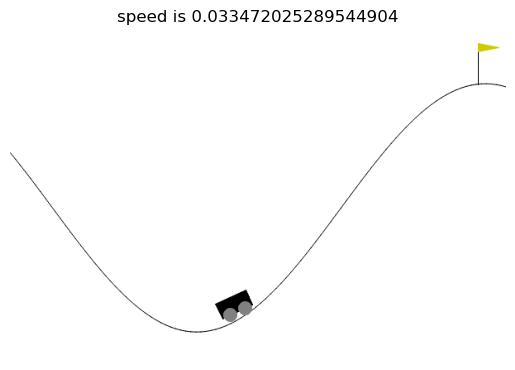

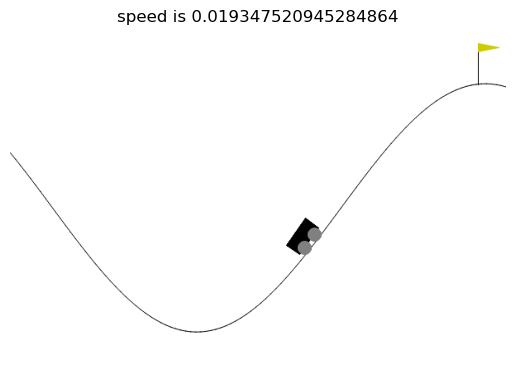

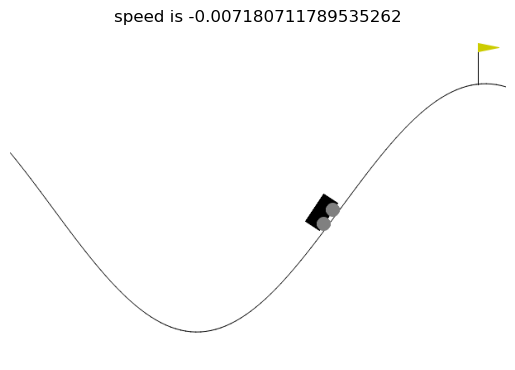

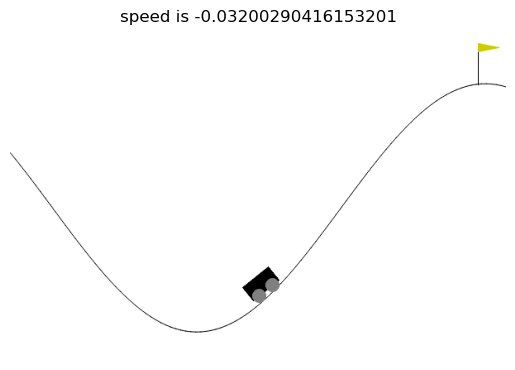

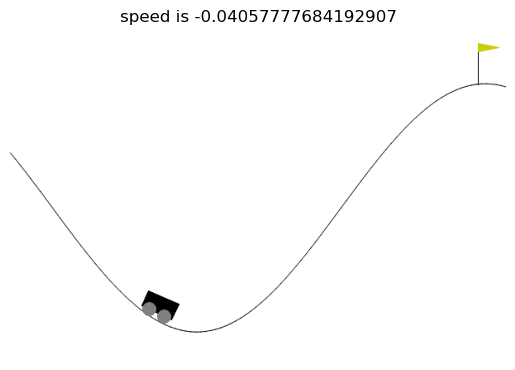

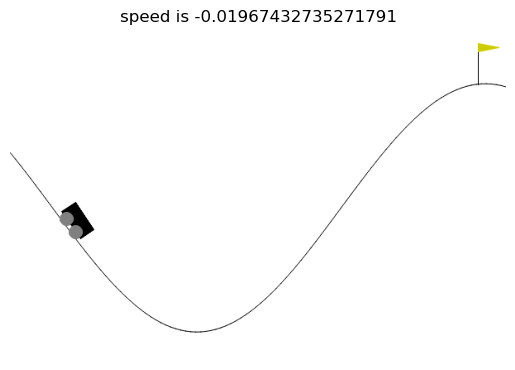

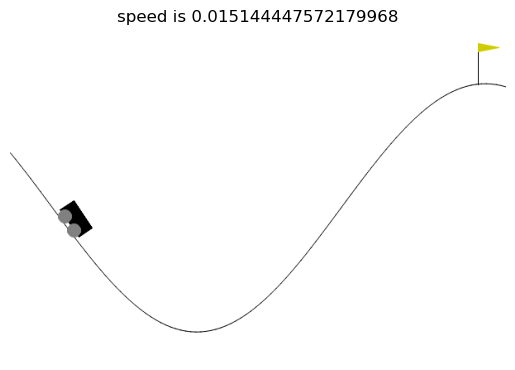

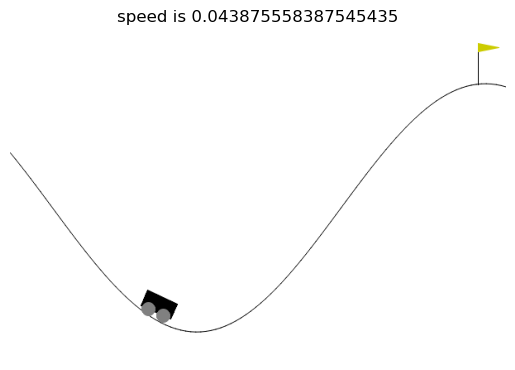

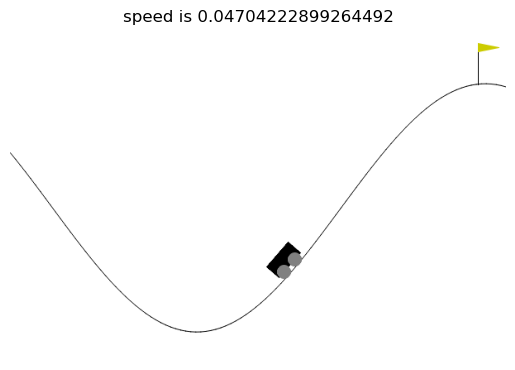

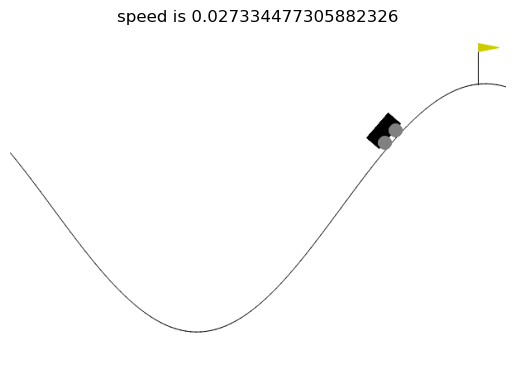

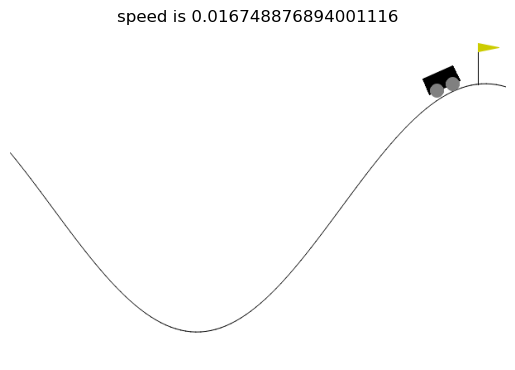

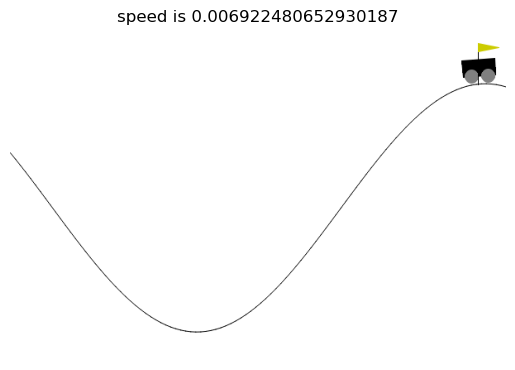

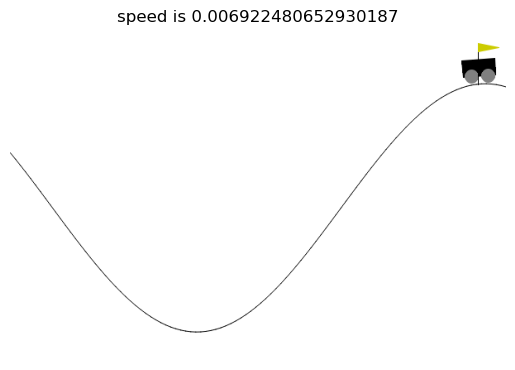

In [11]:
env.reset()
state = env.unwrapped.state
discrete_state = player._get_discrete_state(state)
step_count = 0

while (True):
    action = player.policy[discrete_state]
    new_state, reward, terminated, truncated, _ = env.step(action)
    discrete_state = player._get_discrete_state(new_state)
    step_count += 1

    if (step_count == 10):
        visualize(env)
        step_count = 0
    
    if (truncated or terminated):
        break;

visualize(env)

## SARSA
now we want to use sarsa algorithm here instead of Q learning. The update rule is:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$

In [14]:
class MountainCarSarsa:
    def __init__(self, env, discrete_size=20):
        
        self.env = env
        self.discrete_size = discrete_size
        self.q_values = self._initialize_q_values()
        self.policy = {}
        self.position_min, self.position_max = env.observation_space.low[0], env.observation_space.high[0]
        self.velocity_min, self.velocity_max = env.observation_space.low[1], env.observation_space.high[1]

    def _initialize_q_values(self):
        
        return np.zeros((self.discrete_size, self.discrete_size, self.env.action_space.n))

    def _get_discrete_state(self, state):
        
        position, velocity = state
        position_discrete = int(((position - self.position_min) / (self.position_max - self.position_min)) * (self.discrete_size - 1))
        velocity_discrete = int(((velocity - self.velocity_min) / (self.velocity_max - self.velocity_min)) * (self.discrete_size - 1))
        return (position_discrete, velocity_discrete)


    def learn(self, num_episodes, alpha, gamma, epsilon):
        
        for episode in range(num_episodes):
            state = self.env.reset()[0]
            discrete_state = self._get_discrete_state(state)
            
            # epsilon-greedy:
            if (random.random() > epsilon):
                action = np.argmax(self.q_values[discrete_state])
            else:
                action = self.env.action_space.sample()

            while (True):
                new_state, reward, terminated, truncated, _ = self.env.step(action)
                new_discrete_state = self._get_discrete_state(new_state)
                
                # epsilon:
                if (random.random() > epsilon):
                    next_action = np.argmax(self.q_values[new_discrete_state])
                else:
                    next_action = self.env.action_space.sample()

                # Update Q-values:
                if not (terminated or truncated):
                    current_q = self.q_values[discrete_state + (action,)]
                    next_q = self.q_values[new_discrete_state + (next_action,)]
                    new_q = current_q + alpha * (reward + gamma * next_q - current_q)
                    self.q_values[discrete_state + (action,)] = new_q
                else:
                    self.q_values[discrete_state + (action,)] = reward
                    
                discrete_state = new_discrete_state
                action = next_action

                if (terminated or truncated):
                    break;

    def create_policy(self):
        
        for position in range(self.discrete_size):
            for velocity in range(self.discrete_size):
                self.policy[(position, velocity)] = np.argmax(self.q_values[position, velocity])

    def act(self):
        
        current_state = self.env.unwrapped.state
        discrete_state = self._get_discrete_state(current_state)
        action = self.policy[discrete_state]
        new_state , reward , terminated , truncated , _ = self.env.step(action)
        self.endstate = terminated or truncated
        if(terminated):
            return new_state , reward , True
        if(truncated):
            return new_state , reward , True
        return new_state, reward, False

    def evaluate(self, num_episodes):
        total_rewards = 0
        wins = 0

        for i in range(num_episodes):
            state = self.env.reset()[0]
            discrete_state = self._get_discrete_state(state)
            episode_reward = 0

            while True:
                action = self.policy[discrete_state]
                new_state, reward, terminated, truncated, _ = self.env.step(action)
                discrete_state = self._get_discrete_state(new_state)
                episode_reward += reward

                if (terminated or truncated):
                    if (terminated and new_state[0] >= self.env.goal_position):
                        wins += 1
                    break

            total_rewards += episode_reward

        average_reward = total_rewards / num_episodes
        win_percentage = (wins / num_episodes) * 100

        return average_reward, win_percentage


train your agent with good parameters

Average Reward: -174.225
Win Percentage: 62.0


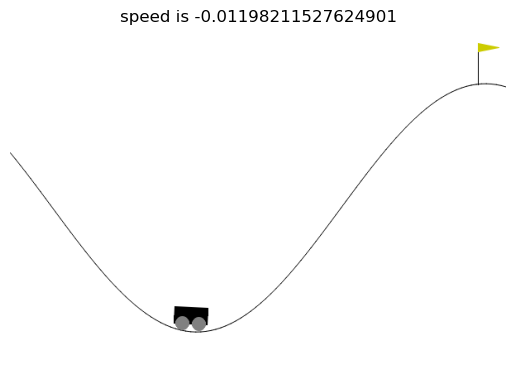

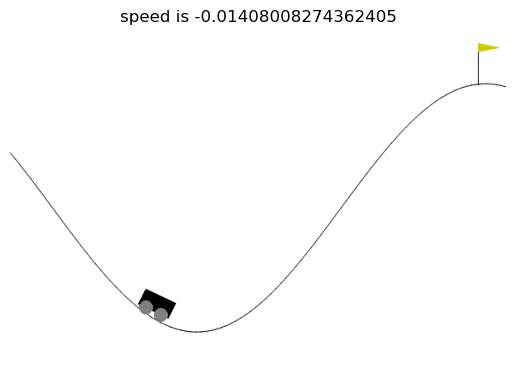

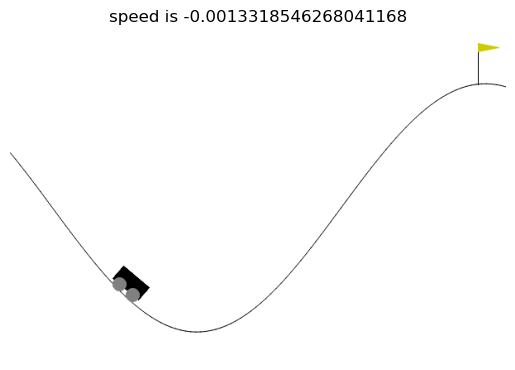

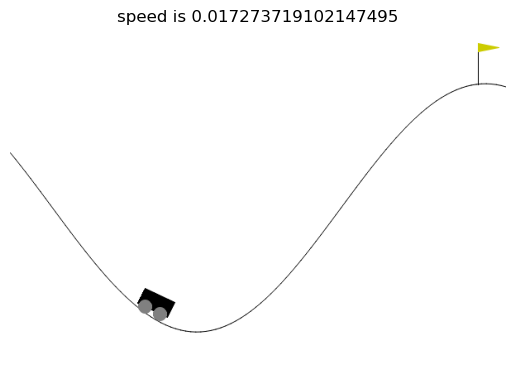

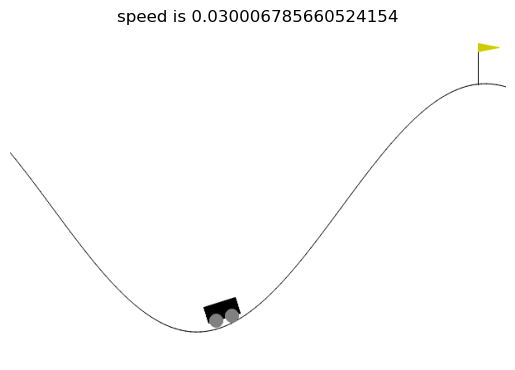

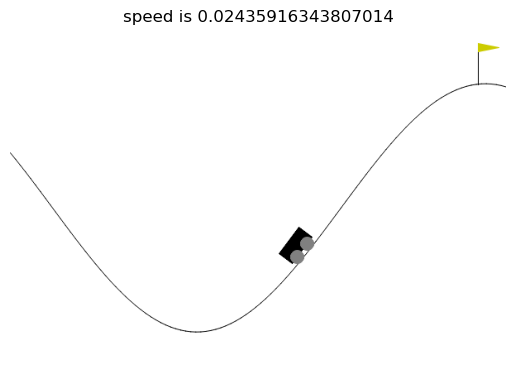

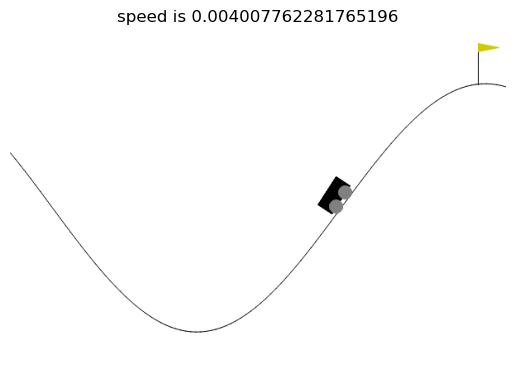

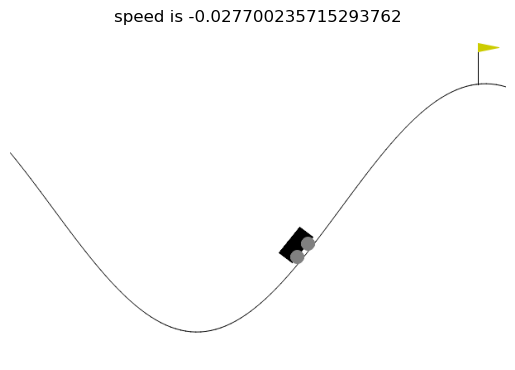

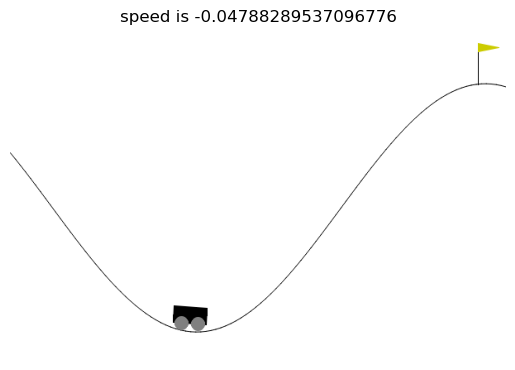

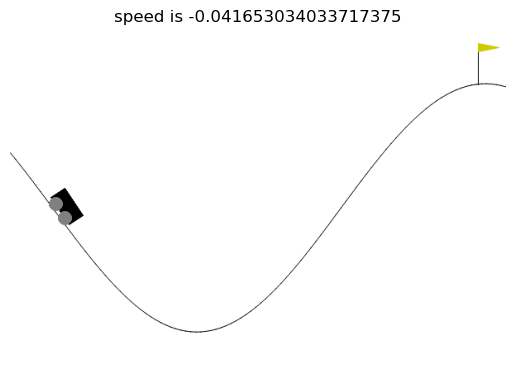

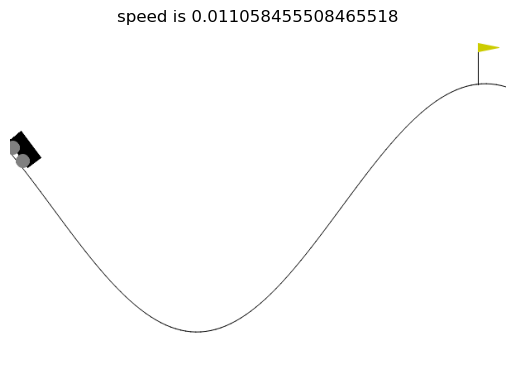

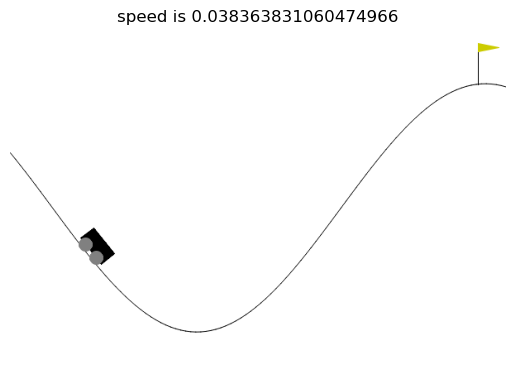

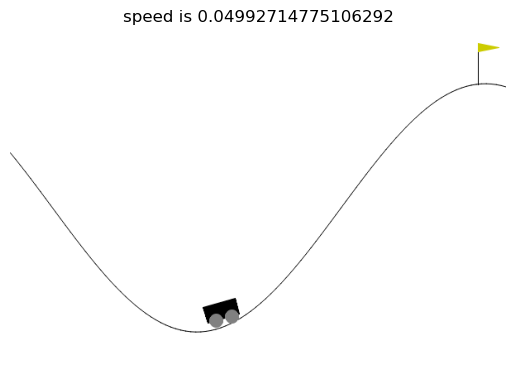

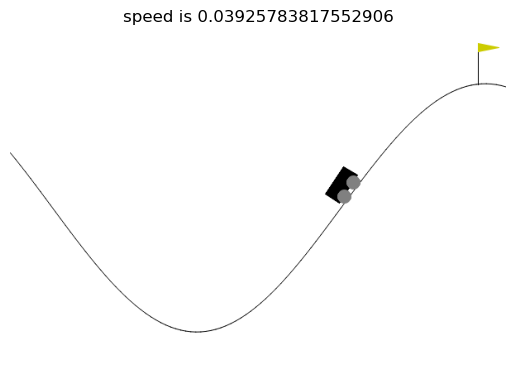

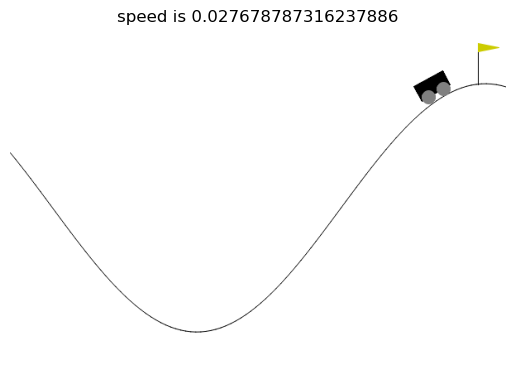

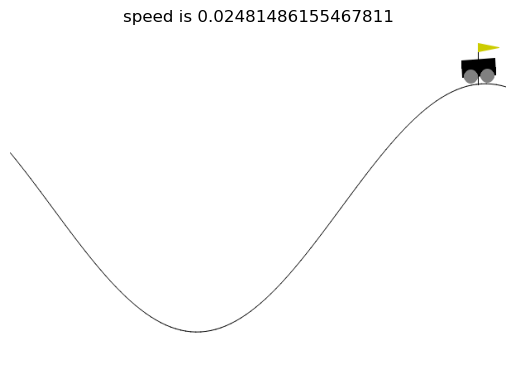

In [15]:
EPISODES = 10000
LEARNING_RATE = 0.2
DISCOUNT = 0.9
EPSILON = 0.2
DISCRETE_SIZE = 30

player_sarsa = MountainCarSarsa(env, discrete_size=DISCRETE_SIZE)
player_sarsa.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON)  # Corrected the typo here

player_sarsa.create_policy()
average_reward, win_percentage = player_sarsa.evaluate(200)

print("Average Reward:", average_reward)
print("Win Percentage:", win_percentage)
env.reset()
state = env.unwrapped.state
discrete_state = player_sarsa._get_discrete_state(state)
step_count = 0

while True:
    action = player_sarsa.policy[discrete_state]
    new_state, reward, terminated, truncated, _ = env.step(action)
    discrete_state = player_sarsa._get_discrete_state(new_state)
    step_count += 1

    if step_count == 10:
        visualize(env)
        step_count = 0

    if truncated or terminated:
        break

visualize(env)

Is there any difference between the two algorithms? Compare results and explain why.

Answer: I've searched in the internet for the differences, here are the results:
            Q - Learning is Off - Policy but while SARSA is On - Policy.
            Q - Learning use the maximum values of the states for update them but SARSA uses the Q - value of the action,
            which is in the policy
            SARSA is more cautious while Q - Learning will take more risks.
        In choosing them we are actually dealling with a trade - off between "exploration" and "exploitation".
        In deterministic environment like we will choose Q - Learning, but is stochastic ones we would like to choose SARSA.
        In this problem the result of the Q - Learning is better than SARSA - Learning.